In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='step', ylabel='Count'>

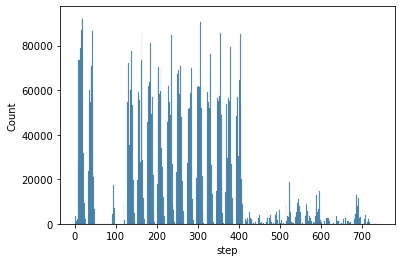

In [6]:
sns.histplot(data=df,x='step')

<AxesSubplot:xlabel='type', ylabel='count'>

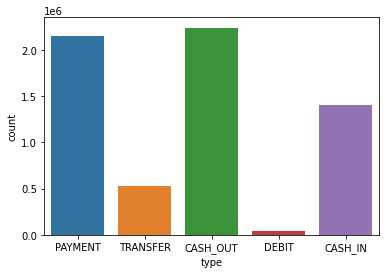

In [7]:
sns.countplot(data=df,x='type')

<AxesSubplot:xlabel='isFraud', ylabel='count'>

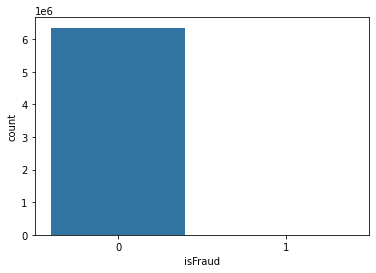

In [8]:
sns.countplot(data=df,x='isFraud')

In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

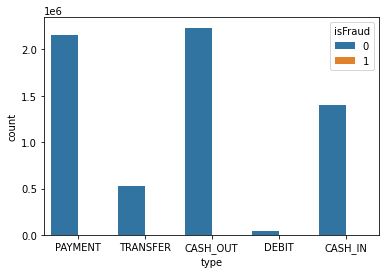

In [11]:
sns.countplot(data=df,x='type',hue='isFraud')

<AxesSubplot:>

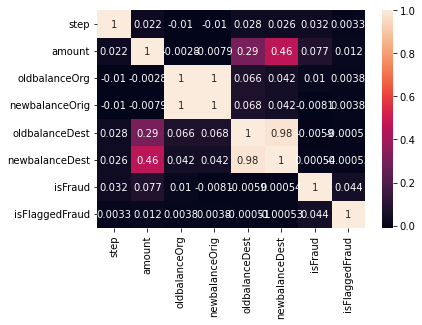

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
df['type']=la.fit_transform(df['type'])

In [15]:
df['type'].value_counts()

1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

In [16]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

# Modeling

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(5090096, 8)
(1272524, 8)
(1272524,)
(5090096,)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# With Logistic Regression


In [20]:
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
accuracy=accuracy_score(y_test,lr_pred)

print("LogisticRegression:{:0.4f}".format(accuracy_score(y_test,lr_pred)))

LogisticRegression:0.9983


# With Random Forest


In [21]:
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)

print("RandomForestClassifier:{0:.4f}".format(accuracy))

RandomForestClassifier:0.9997


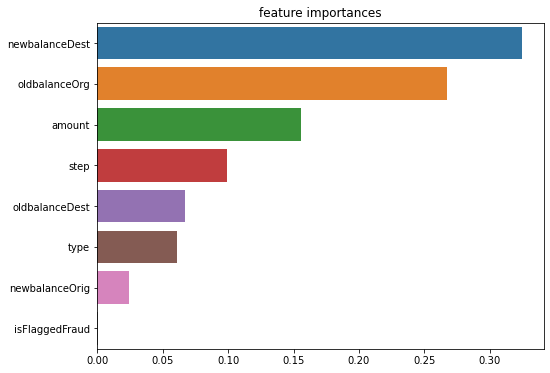

In [22]:
# Random Forest with an accuracy of 0.9997

ftr_importances_values=rf_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("feature importances")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()